### Package Imports

In [7]:
import pandas
import numpy
from matplotlib import pyplot
import seaborn
from sklearn import datasets, discriminant_analysis, model_selection, covariance, metrics

### Load Iris dataset

In [8]:
iris = datasets.load_iris()
df = pandas.DataFrame(data=numpy.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])
df['species'] = pandas.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']
df = df.astype({'target': 'int32'})
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Define predictor and response variables

In [9]:
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

### Model selection and validation

In [10]:
param_grid = [
    {'solver': ['svd']},
    {'solver': ['eigen', 'lsqr'], 'shrinkage': [None, 'auto']},
]

grid_search_cv = model_selection.GridSearchCV(
    estimator=discriminant_analysis.LinearDiscriminantAnalysis(), param_grid=param_grid, scoring='accuracy', n_jobs=-1, 
    refit=True, cv=5, verbose=4, error_score='raise'
)
grid_search_cv.fit(X, y)
grid_search_cv.best_params_, grid_search_cv.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


({'solver': 'svd'}, 0.9800000000000001)

### Metrics

### Plot

In [11]:
model = grid_search_cv.best_estimator_
predictions = model.predict(X)
print(metrics.classification_report(y, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.96      0.97        50
   virginica       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



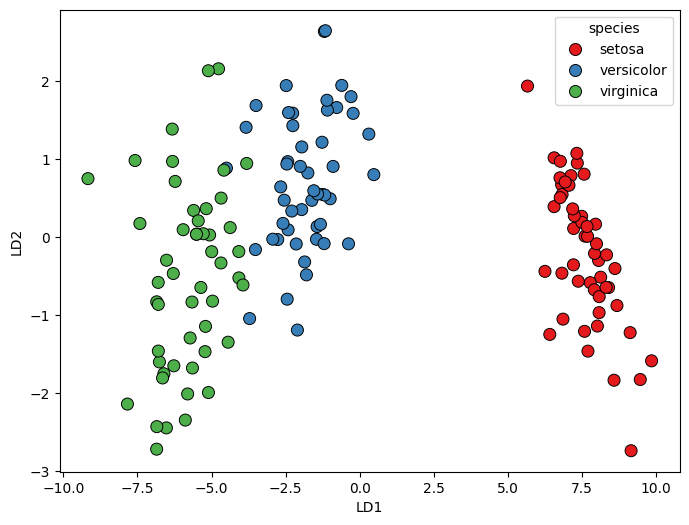

In [12]:
pyplot.figure(figsize=(8, 6))

X_lda = model.transform(X)

seaborn.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y, palette="Set1", edgecolor="k", s=75)

pyplot.xlabel("LD1")
pyplot.ylabel("LD2")
pyplot.show()